This is a basic tool for graph (or network, we shall use the terms interchangeably) creation and traversal.

This tutorial MUST be read in conjunction with the official networkx documentation which is at: https://networkx.org/documentation/stable/reference/index.html

This tutorial is the backbone of Project1 when used with Tutorial 2.

In [1]:
import networkx as nx # create an empty graph
import matplotlib.pyplot as plt
from itertools import permutations
import sys

In [2]:
sys.path.append("../:../tests")

In [3]:
from conftest import static_city_map

ModuleNotFoundError: No module named 'conftest'

In [4]:
from traffic_simulator.model import Road

ModuleNotFoundError: No module named 'traffic_simulator'

In [169]:
# create example graph for R2
G=nx.Graph()
# G.add_edges_from([(0,1, {'weight': 6}), (0, 4, {'weight': 9}), (1, 3,{'weight': 11}), (2,4, {'weight': 10}), (3,4, {'weight': 7})])
G.add_edges_from([(0,1, {'weight': 50}), (0, 4, {'weight': 9}), (1, 3,{'weight': 11}), (2,4, {'weight': 10}), (3,4, {'weight': 7})])

node degree and node clustering
0 2 0
1 2 0
4 3 0
3 2 0
2 1 0

the adjacency list
0 1 4
1 3
4 2 3
3
2
{(0, 1): 50, (0, 4): 9, (1, 3): 11, (4, 2): 10, (4, 3): 7}


/var/folders/3n/7kvkbqjd0l9grdj7kptkcfgr0000gn/T/ipykernel_7458/3146715701.py:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.nx_pydot.graphviz_layout(G)


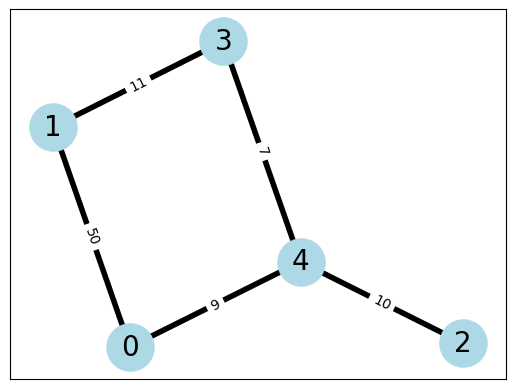

In [170]:


# some properties
print("node degree and node clustering")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                               # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, 'weight','trips')
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [46]:
nx.shortest_path(G,2,1,method='dijkstra')     # find the shortest path between two nodes using Dijkstra's algorithm; in this case between two nodes

[2, 4, 0, 1]

Q1) Find the length of the shortest path using Dijsktra's algorithm.

In [47]:
nx.dijkstra_path_length(G,2,1)

25

Q2) Make use of the A* algorithm to find the shortest path;  A* in general is faster than Dijkstra's algorithm.

In [48]:
nx.astar_path(G,2,1)

[2, 4, 0, 1]

Q3) Find the length of the shortest path using the A* algorithm.

In [49]:
nx.astar_path_length(G,2,1)

25

In [173]:
nx.astar_path(G, 0, 1)

[0, 4, 3, 1]

In [174]:
nx.astar_path_length(G, 0, 1)

27

In [69]:
# Find all possible paths between all pairs of nodes
all_paths = []
for source in G.nodes():
    for destination in G.nodes():
        if source != target:
            paths = nx.all_simple_paths(G, source=source, target=destination)
            for path in paths:
                source = path[0]
                destination = path[-1]
                all_paths.append([source, destination])

# Remove duplicates from the list
all_paths = list(set(map(tuple, all_paths)))

road_candidates = []

for path in all_paths:
    source = path[0]
    print(f"({source},{desination})")

(0,3)
(1,3)
(0,3)
(4,3)
(3,3)
(4,3)
(4,3)
(3,3)
(0,3)
(1,3)
(4,3)
(3,3)
(0,3)
(1,3)
(3,3)
(1,3)


In [61]:
len(all_paths)

16

In [41]:
all_nodes = list(G.nodes())
all_nodes

[]

In [58]:
# Get all nodes in the graph
all_nodes = list(G.nodes())
trips = []

# Create a list of permutations of pairs of nodes
for source, destination in permutations(all_nodes, 2):
    trips.append((source, destination))

# Print the list of permutations
print("List of trips:")
for trip in trips:
    print(trip)

List of trips:
(0, 1)
(0, 4)
(0, 3)
(0, 2)
(1, 0)
(1, 4)
(1, 3)
(1, 2)
(4, 0)
(4, 1)
(4, 3)
(4, 2)
(3, 0)
(3, 1)
(3, 4)
(3, 2)
(2, 0)
(2, 1)
(2, 4)
(2, 3)


In [60]:
len(trips)

20

In [66]:
len(set(trips))

20

In [68]:
len(set(all_paths))

16

In [63]:
set(trips) - set(all_paths)

{(2, 0), (2, 1), (2, 3), (2, 4)}

In [64]:
set(all_paths) - set(trips)

set()

In [71]:
for trip in trips:
    source = trip[0]
    destination = trip[1]

    if nx.has_path(G, source, source):
        print((source, destination))

(0, 1)
(0, 4)
(0, 3)
(0, 2)
(1, 0)
(1, 4)
(1, 3)
(1, 2)
(4, 0)
(4, 1)
(4, 3)
(4, 2)
(3, 0)
(3, 1)
(3, 4)
(3, 2)
(2, 0)
(2, 1)
(2, 4)
(2, 3)


In [8]:
seed=1000           # seed the graph for reproducibility, you should be doing this once you generate a connected graph
G= nx.gnp_random_graph (60, .06, seed=seed) # uncomment this and the above line once you have a connected graph.
# G= nx.gnp_random_graph (60, .06)       # here we create a random binomial graph with 10 nodes and an average (expected) connectivity of 10*.3= 3.

In [9]:
nx.is_connected(G)      # check whether G which has at least one path between each pair of nodes.

False

In [10]:
from random import randint
for u, v in G.edges:
  G.add_edge(u, v, weight=randint(5,25))

In [27]:
nx.all_simple_paths(G, 0, 2)

<generator object _all_simple_paths_graph at 0x126a17190>

In [24]:
nx.astar_path(G, 0, 2)

[0, 4, 2]

In [25]:
nx.astar_path_length(G, 0, 2)

19

In [29]:
nx.astar_path_length(G, 0, 3)

16

In [30]:
nx.astar_path_length(G, 1, 2)

25

In [32]:
nx.astar_path_length(G, 2, 3)

17

In [33]:
all_paths

[(4, 0),
 (3, 4),
 (4, 3),
 (3, 1),
 (0, 2),
 (1, 0),
 (1, 3),
 (4, 2),
 (3, 0),
 (0, 1),
 (2, 4),
 (1, 2),
 (0, 4),
 (2, 1),
 (3, 2),
 (4, 1),
 (0, 3),
 (2, 0),
 (1, 4),
 (2, 3)]

In [73]:
direct_connections = list(G.edges())
direct_connections

[(0, 1), (0, 4), (1, 3), (4, 2), (4, 3)]

In [74]:

non_edges

[(0, 2), (0, 3), (1, 2), (1, 4), (2, 3)]

In [80]:
set(set(nx.non_edges(G)))

{(0, 2), (0, 3), (1, 2), (1, 4), (2, 3)}

In [151]:
def get_indirect_benefit(city_map, source, destination):
    indirect_benefits = set()
    
    if not city_map.has_edge(source, destination):
        indirect_benefits.add((source, destination))
        indirect_benefits.add((destination, source))
        print("We are here!")
        print(f"New Set: {indirect_benefits}")
    
        
    return indirect_benefits

In [130]:
ny_neighbors

{1, 4}

In [131]:
x = 0
y = 2

In [132]:
nx_neighbors = set(G.neighbors(y))
ny_neighbors = set(G.neighbors(x))

In [133]:
for nx_neighbor in nx_neighbors:
    print(nx_neighbor)

4


In [147]:
nx_indirect_benefits = set()

for nx_neighbor in nx_neighbors:
    
    nx_indirect_benefits.union(get_indirect_benefit(G, x, nx_neighbor))

nx_indirect_benefits

set()

In [155]:
ny_indirect_benefits = set()

for ny_neighbor in ny_neighbors:
    ny_indirect_benefits = ny_indirect_benefits.union(get_indirect_benefit(G, y, ny_neighbor))

ny_indirect_benefits

We are here!
New Set: {(1, 2), (2, 1)}


{(1, 2), (2, 1)}

In [109]:
not nx.has_path(G, 2, 1)

False

In [140]:
y

2

In [141]:
ny_neighbors

{1, 4}

In [143]:
G.has_edge(2, 1)

False

In [177]:
G.get_edge_data(2, 4)

{'weight': 10}